In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Electric_Vehicle_Population_Data.csv")  




In [4]:
df.columns


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


/var/folders/09/m355l4794bn1lmxkdfwytpgr0000gn/T/ipykernel_44402/3770467548.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


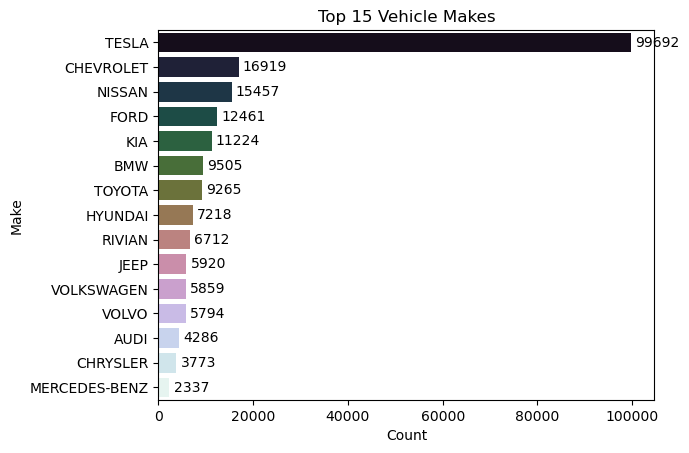

In [6]:
plt.subplot(1, 1, 1)

df_filtered = df[df["Make"].notna()]

top_makes = df_filtered["Make"].value_counts().head(15).index

ax = sns.countplot(
    data=df_filtered[df_filtered["Make"].isin(top_makes)],
    y="Make",
    order=top_makes,
    palette="cubehelix"
)

plt.title("Top 15 Vehicle Makes")
plt.xlabel("Count")

for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=3)



/var/folders/09/m355l4794bn1lmxkdfwytpgr0000gn/T/ipykernel_44402/1264710808.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Electric Vehicle Type", palette="coolwarm")


Text(0.5, 1.0, 'Electric Vehicle Type Distribution')

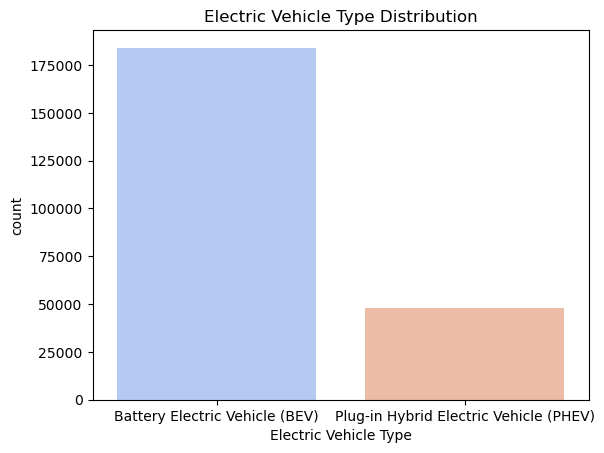

In [7]:
# Plot 2: Countplot - Electric Vehicle Type
plt.subplot(1,1,1)
df_filtered = df[df["Electric Vehicle Type"].notna()]
sns.countplot(data=df, x="Electric Vehicle Type", palette="coolwarm")
plt.title("Electric Vehicle Type Distribution")

Text(0, 0.5, 'Base MSRP')

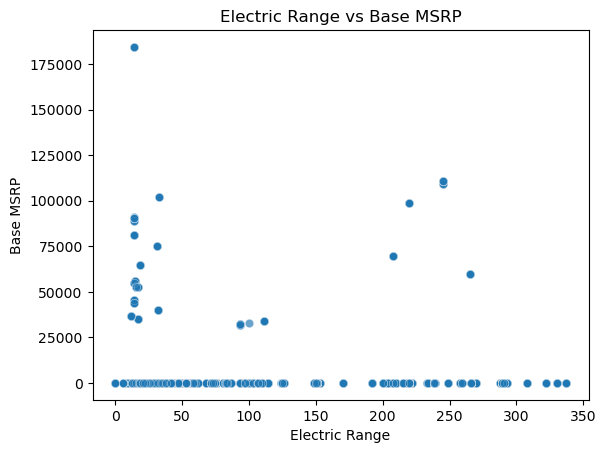

In [8]:
# Plot 6: Scatterplot - Electric Range vs Base MSRP (กรองราคาสูงเกิน)
plt.subplot(1,1,1)
df_filtered = df[df["Electric Range"].notna()]
df_filtered = df[df["Base MSRP"].notna()]

sns.scatterplot(
    data=df[df["Base MSRP"] < 200000], 
    x="Electric Range", y="Base MSRP", alpha=0.3
)
plt.title("Electric Range vs Base MSRP")
plt.xlabel("Electric Range")
plt.ylabel("Base MSRP")